In [1]:
# slide 23/30
# A principal claims that the students in his school are above average
# intelligence - a random sample of 35 students from the school has a mean score of 112.
# Assume the mean population IQ is 100 with a standard deviation of 15.
# Is the principal right?
# Do it in Python and plot it!

# Cell 3 contains an alternative ridiculously big standard deviation to demonstrate a counter-intuitive conclusion

### Hypothesis testing breakout
A principal claims that the students in his school are above average
intelligence (above 100 IQ) - a random sample of 35 students had a mean score of 112. 
Is there sufficient evidence to support the principal’s claim?   <br>  

Suppose the mean student population IQ is 100 with a standard deviation of 15.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.style.use('ggplot')

In [2]:
# reasonable font size
plt.rcParams.update({'font.size': 14})

In [3]:
mu = 100     # population mean IQ 
sigma = 15   # population standard deviation
# sigma = 60   # big population standard deviation
x_bar = 112  # sample mean
n = 50       # sample size

### State Null and Alternative Hypotheses
H0: x_bar <= 100 (the mean student at the school is of average or lesser intelligence) <br>
H1: x_bar > 100 (the mean student at the school is of higher intelligence)

For H0, I need to pick the null distribution most difficult for results to reject.  H0 is normally distributed with population mean = 100 with sem = 15 / sqrt(50).

### State the significance level

In [4]:
alpha = 0.05 # 1 chance in 20 of making a Type I error

### Find the appropriate test and compute the test statistic
The null hypothesis distribution is based on population data so we'll choose to do a Z-test.

The type of test we'll be doing is a one sample Z-test, where we are checking if the school mean IQ is different from the population (is 112 different than 100?)

In [5]:
  # standard error of the mean (std of sample mean)
Z = (x_bar - mu)/(sigma/n**0.5)    # because we have the population std we don't need N
print(f"The Z statistic is {Z:0.2f}.")

The Z statistic is 5.66.


Let's plot the Z statistic to understand what's going on.

In [6]:
dist_IQpop = stats.norm(mu, sigma)
dist_IQsampmean = stats.norm(mu, sigma/n**0.5)
IQs = np.linspace(dist_IQpop.ppf(0.01),
                  dist_IQpop.ppf(0.99), 100)
pdf_IQs = dist_IQpop.pdf(IQs)
pdf_samp_mean_IQs = dist_IQsampmean.pdf(IQs)

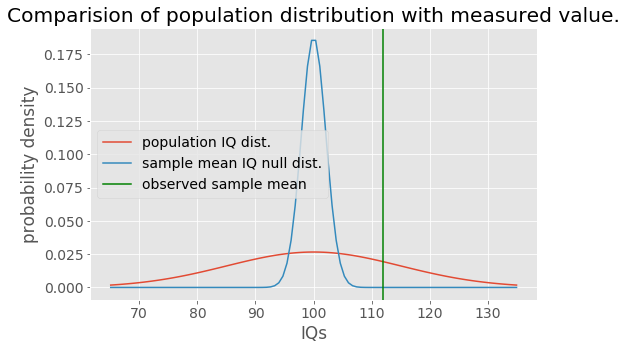

In [7]:
figsize = (8,5)
fig, ax = plt.subplots(1, 1, figsize=figsize) 
ax.plot(IQs, pdf_IQs, label='population IQ dist.')
ax.plot(IQs, pdf_samp_mean_IQs, label='sample mean IQ null dist.')
ax.axvline(x_bar, color='green', label='observed sample mean') 
ax.legend(loc='best')
#ax.set_xlim((80, 130))
ax.set_title("Comparision of population distribution with measured value.")
ax.set_xlabel("IQs")
ax.set_ylabel("probability density");

### Calculate the probability of the results (assuming the null hypothesis is true)

In [8]:
# p = 1 - dist_IQpop.cdf(x_bar)
p = 1 - dist_IQsampmean.cdf(x_bar)
print("The probability of these results, or more extreme results, given the "
      "null hypothesis is true is {0:0.2f}.".format(p))

The probability of these results, or more extreme results, given the null hypothesis is true is 0.00.


### Note that we didn't actually need the t or z statistic to calculate p.  It used to be that you had to look up the p value from a t or Z table.  Python to the rescue.

### Plot the cdf:

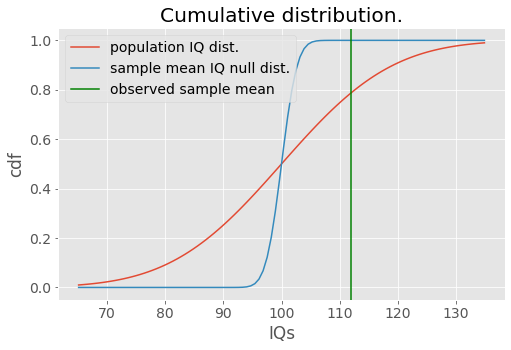

In [9]:
cdf_IQs = dist_IQpop.cdf(IQs)
cdf_samp_mean_IQs = dist_IQsampmean.cdf(IQs)
fig, ax = plt.subplots(1, 1, figsize=figsize) 
ax.plot(IQs, cdf_IQs, label='population IQ dist.')
ax.plot(IQs, cdf_samp_mean_IQs, label='sample mean IQ null dist.')
ax.axvline(x_bar, color='green', label='observed sample mean') 
ax.legend(loc='best')
#ax.set_xlim((80, 130))
ax.set_title("Cumulative distribution.")
ax.set_xlabel("IQs")
ax.set_ylabel("cdf");

###  Make a conclusion

In [10]:
if p <= alpha:
    print("Reject Null, the school's IQ is greater than the population")
else:
    print("Cannot reject Null, the school's IQ could have come from "
          "the population.")

Reject Null, the school's IQ is greater than the population
